In [25]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from flaregress.io import DatabaseHandler
from flaregress.prepare import DataChunker

In [5]:
# Load the data
db = DatabaseHandler()
db.load('./trial_data/db.h5')

In [39]:
# Test cell
db.entries[4000]['f107'].shape[0]

1

In [51]:
# Model hyperparameters
kernel = 'rbf'
C = 1e3
gamma = 0.1
split_fraction = 0.7
entry_number = 4000

In [52]:
# Chunking parameters
window_size = 5

# Format data for SVR
split = int(len(db.entries[entry_number]['xrs'].values) * split_fraction)
training_stream = [x[0] for x in db.entries[entry_number]['xrs'].values[:split]]
test_stream = [x[0] for x in db.entries[entry_number]['xrs'].values[split:]]
train_x, train_y, test_x, test_y = [], [], [], []
for i in range(len(training_stream) - window_size):
    train_x.append(training_stream[i:i+window_size])
    train_y.append(training_stream[i+window_size])
for i in range(len(test_stream) - window_size):
    test_x.append(test_stream[i:i+window_size])
    test_y.append(test_stream[i+window_size])
    
# chunks, test = DataChunker(db, streams=('xrs'), num_historical_goes=5).chunk()

In [53]:
# Train the model
svr = SVR(kernel=kernel, C=C, gamma=gamma)
predictions = svr.fit(train_x, train_y).predict(test_x)
mse = mean_squared_error(test_y, predictions); mean = sum(test_y)/len(test_y)
print('Test MSE:', mse)

Test MSE: 1.6654461810658652e-13


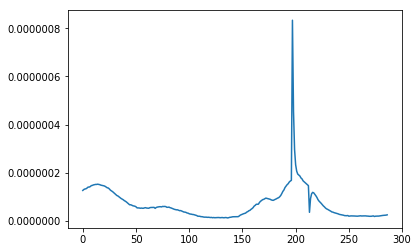

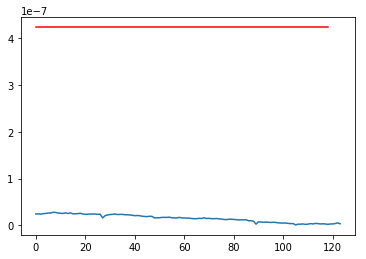

In [54]:
# Plot the results
plt.plot(training_stream)
plt.show()
plt.plot(test_stream)
plt.plot(predictions, color='red')
plt.show()